# Calculate future frequencies from tip attributes

Use the tip attributes table and a delta time in months to build a data frame of future clade frequencies.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

In [2]:
!pwd

/Users/jlhudd/projects/nextstrain/flu-forecasting/analyses


In [3]:
tips = pd.read_csv("../results/builds/h3n2/5_viruses_per_month/sample_0/2005-10-01--2015-10-01/standardized_tip_attributes.tsv",
                   sep="\t", parse_dates=["timepoint"])
tips = tips.loc[
    tips["segment"] == "ha",
    ["strain", "clade_membership", "timepoint", "frequency"]
].copy()

In [4]:
tips.head()

,strain,clade_membership,timepoint,frequency
0,A/Argentina/7646/2009,475ef64,2009-10-01,0.006532
1,A/Astrakhan/7/2009,475ef64,2009-10-01,0.009365
2,A/Australia/2/2009,d6f8d49,2009-10-01,0.000536
3,A/Australia/55/2009,b1f1517,2009-10-01,0.000528
4,A/Bangladesh/7772/2009,23082c4,2009-10-01,0.030828


In [22]:
delta_months = 12
delta_t = pd.DateOffset(months=delta_months)

In [23]:
delta_t

<DateOffset: months=12>

In [24]:
clades_by_timepoint = tips.loc[:, ["timepoint", "clade_membership"]].drop_duplicates().copy()

In [25]:
clades_by_timepoint.head()

,timepoint,clade_membership
0,2009-10-01,475ef64
2,2009-10-01,d6f8d49
3,2009-10-01,b1f1517
4,2009-10-01,23082c4
11,2009-10-01,c205092


In [26]:
clades_by_timepoint.shape

(79, 2)

In [27]:
clades_by_timepoint["future_timepoint"] = clades_by_timepoint["timepoint"] + delta_t

In [28]:
future_tips = clades_by_timepoint.merge(
    tips,
    how="left",
    left_on=["future_timepoint", "clade_membership"],
    right_on=["timepoint", "clade_membership"],
    suffixes=["", "_tips"]
).drop(columns="timepoint_tips")

In [29]:
future_tips["frequency"] = future_tips["frequency"].fillna(0.0)

In [30]:
future_tips.groupby(["timepoint"])["frequency"].sum()

timepoint
2009-10-01    0.224556
2010-04-01    0.132032
2010-10-01    0.164810
2011-04-01    0.167006
2011-10-01    0.452747
2012-04-01    0.000000
2012-10-01    0.000000
Name: frequency, dtype: float64

In [14]:
(tips.clade_membership.value_counts() == 1).sum()

6

In [15]:
clade_counts = tips.groupby(["clade_membership", "timepoint"])["frequency"].aggregate(["count", "sum"]).reset_index()

In [16]:
clade_counts.head()

,clade_membership,timepoint,count,sum
0,02aea16,2009-10-01,1,0.001086
1,124edcb,2010-10-01,1,0.000001
2,124edcb,2011-04-01,1,0.000003
3,216b1df,2011-04-01,10,0.118790
4,216b1df,2011-10-01,7,0.001058


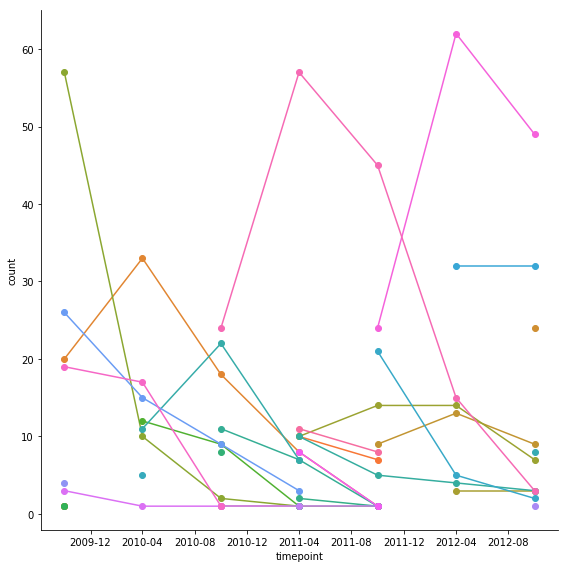

In [21]:
g = sns.FacetGrid(clade_counts, hue="clade_membership", height=8)
g.map(plt.plot, "timepoint", "count", marker="o")
#g.axes.flatten()[0].set_ylim(0, 50)

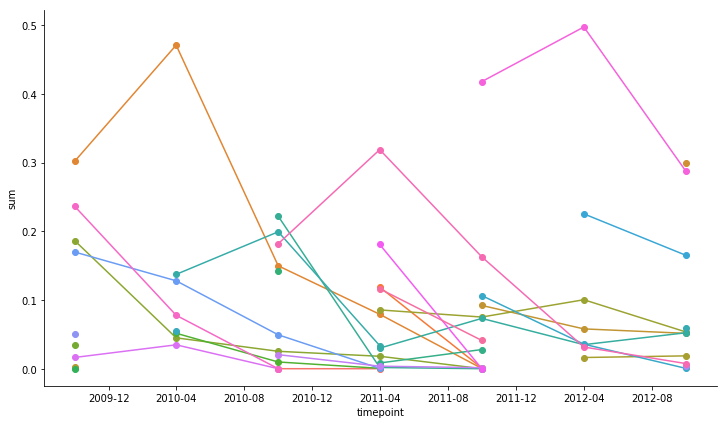

In [18]:
g = sns.FacetGrid(clade_counts, hue="clade_membership", height=6, aspect=1.7)
g.map(plt.plot, "timepoint", "sum", marker="o")
#g.axes.flatten()[0].set_ylim(0, 1)

In [20]:
clade_counts.groupby("timepoint")["sum"].sum()

timepoint
2009-10-01    1.000001
2010-04-01    1.000003
2010-10-01    1.000002
2011-04-01    0.999997
2011-10-01    0.999995
2012-04-01    0.999995
2012-10-01    0.999998
Name: sum, dtype: float64